In [ ]:
#pip install dlib

In [1]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


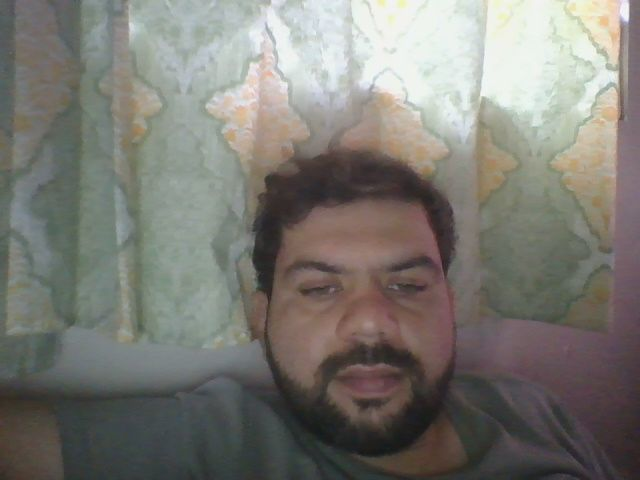

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

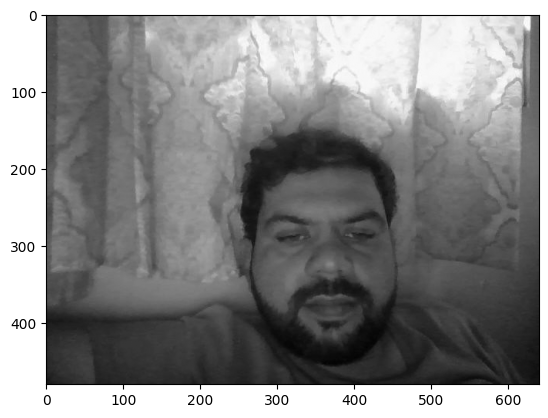

In [5]:
#img=cv2.imread('/content/1_.jpg')
img=cv2.imread(filename)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_copy=img.copy()
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')

In [7]:
import zipfile
zipp=zipfile.ZipFile('/content/68_faces_landmark.zip')
zipp.extractall()

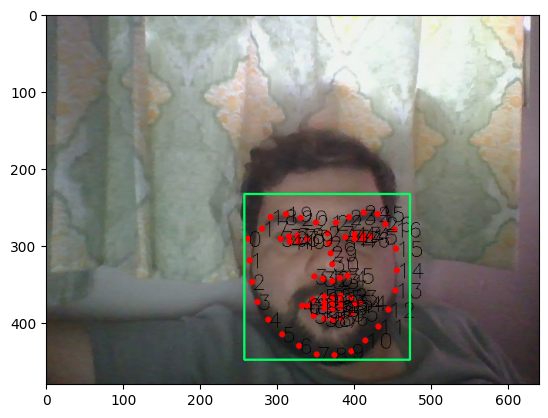

In [8]:
detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
face=detector(img_gray)

for f in face:
  x1,y1=f.left(),f.top()
  x2,y2=f.right(),f.bottom()
  landmarks=predictor(img_gray,f)
  points=[]
  for n in range(68):
    i=landmarks.part(n).x
    j=landmarks.part(n).y
    points.append([i,j])
    cv2.circle(img_copy,(i,j),4,(255,0,0),cv2.FILLED)
    cv2.putText(img_copy,str(n),(i,j+10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,0,0),1)

cv2.rectangle(img_copy,(x1,y1),(x2,y2),(0,255,100),2)
plt.imshow(img_copy)

In [9]:
def createbox(img,points,masked=True,croped=False):
  if croped:
    x,y,w,h=cv2.boundingRect(points)
    imgcroped=img[y:y+h,x:x+w]
    return imgcroped
  if masked:
    mask=np.zeros_like(img)
    mask=cv2.fillPoly(mask,[points],(255,255,255))
    return mask

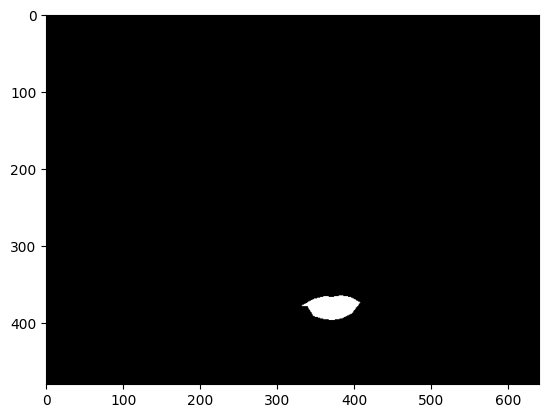

In [10]:
points=np.array(points)
img_lip=createbox(img_copy,points[48:61])
plt.imshow(img_lip)

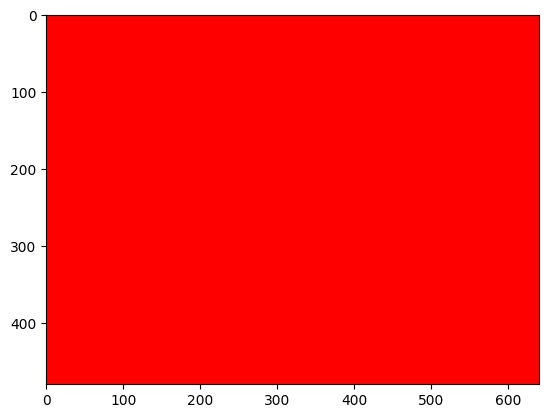

In [11]:
lip_color=np.zeros_like(img_lip)
lip_color[:]=255,0,0
plt.imshow(lip_color)

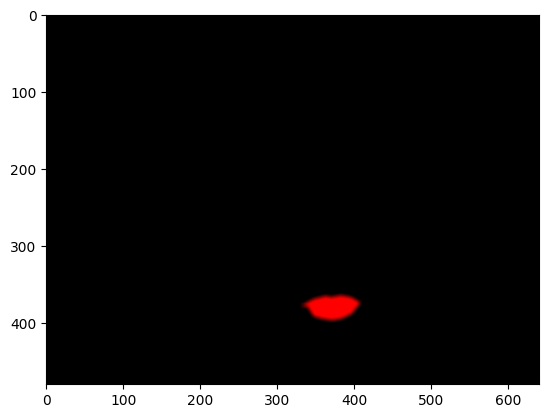

In [12]:
colored_lip=cv2.bitwise_and(img_lip,lip_color)
colored_lip=cv2.GaussianBlur(colored_lip,(7,7),10)
plt.imshow(colored_lip)

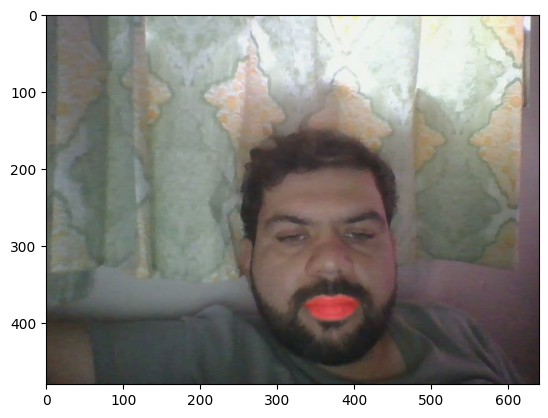

In [13]:
lip_colored=cv2.addWeighted(img,1,colored_lip,0.4,0)
plt.imshow(lip_colored)